In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import utils

np.random.seed(0)

/Users/luisserrano/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/luisserrano/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/luisserrano/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


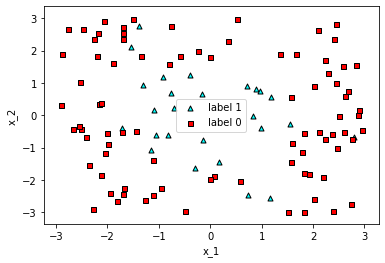

In [5]:
# Loading the one_circle dataset

df = pd.read_csv('one_circle.csv', index_col=0)
X = np.array(df[['x_1', 'x_2']])
y = np.array(df['y']).astype(int)
utils.plot_points(X,y)

In [6]:
df

,x_1,x_2,y
0,-0.759416,2.753240,0
1,-1.885278,1.629527,0
2,2.463302,-1.023869,0
3,-1.986004,-0.898810,0
4,2.010834,-2.580117,0
...,...,...,...
105,-1.376637,2.778703,1
106,-0.703722,0.215382,1
107,0.729767,-2.479655,1
108,-1.715920,-0.393404,1


In [9]:
X[:10]

array([[-0.759416  ,  2.7532401 ],
       [-1.8852779 ,  1.62952654],
       [ 2.46330243, -1.02386888],
       [-1.98600415, -0.89880979],
       [ 2.01083403, -2.58011745],
       [ 2.41018752,  2.37050087],
       [ 1.59914005, -0.86273162],
       [-1.10985644, -2.46969746],
       [ 2.4473419 ,  2.81117994],
       [-1.69773161,  2.53984757]])

In [10]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
# Categorizing the output

from tensorflow.keras.utils import to_categorical
categorized_y = np.array(to_categorical(y, 2))
categorized_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [12]:
# Imports
#import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.layers import Dense, Dropout, Activation
#from tensorflow.keras.optimizers import SGD

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(2,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 8,770
Trainable params: 8,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Training the model
model.fit(X, categorized_y, epochs=200, batch_size=10)

Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.6455
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.7636
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.7636
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.7636
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.7636
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.7636
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.7636
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 0.4493 - accuracy: 0.7636
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.7636
Epoch 10/200
11/11 [==============================] - 0s 5ms/step - loss: 0.4088 - accuracy: 0.7636
Epoch 11/

11/11 [==============================] - 0s 4ms/step - loss: 0.2782 - accuracy: 0.8909
Epoch 84/200
11/11 [==============================] - 0s 4ms/step - loss: 0.2274 - accuracy: 0.9364
Epoch 85/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.8818
Epoch 86/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9182
Epoch 87/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9182
Epoch 88/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.8909
Epoch 89/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2428 - accuracy: 0.9091
Epoch 90/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.9000
Epoch 91/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1938 - accuracy: 0.9182
Epoch 92/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.9000
Epoch 93/200


11/11 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9273
Epoch 165/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9000
Epoch 166/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1961 - accuracy: 0.9091
Epoch 167/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.9273
Epoch 168/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9182
Epoch 169/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2142 - accuracy: 0.9000
Epoch 170/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9091
Epoch 171/200
11/11 [==============================] - 0s 3ms/step - loss: 0.2067 - accuracy: 0.9364
Epoch 172/200
11/11 [==============================] - 0s 3ms/step - loss: 0.1958 - accuracy: 0.9182
Epoch 173/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.8909
Epoc

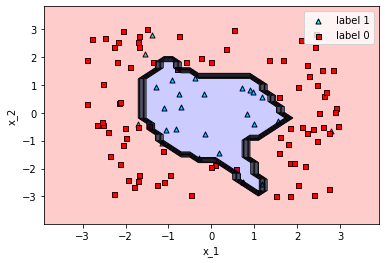

In [14]:
utils.plot_model(X, y, model)